**CONTENTS**

Import libraries and data

Initial checks

Creating my 3 subsets

Day 0 Subset

Office hours subset

South subset

Crosstab 1 - Day 0 profile

Creating a new column for High Spending New Customers

Visualising proportion of profile by region

Visualising proportion of profile by family circumstance

Office hours profile - comparing a profile with whole population

Sales by department in office hours v overall

Line chart: alcohol sales by age

Histogram: alcohol sales by age

Genders of people buying alcohol

Key stats - those buying alcohol

Visualise alcohol profile by region

PROFILE of the SOUTH

Creating a smaller data frame - based on total $ sales

Creating a smaller data frame - based on count of sales



APPROACH

My challenge from Karen is to push myself to create more interesting profiles, and for that I'll need to use additional techniques.

I will start with some things I already know.

Day 0 is the day with most sales

The most sales happen between 9:00 and 17:00

The most customers are in the South

I'm going to:
1) From the "Good Customers" dataframe I created in the first part of this exercise create three subsets: Day 0 Only, 9-17 only, South only.
2) Use crosstabs, with the flags I have already created, to look for interesting profiles

# **Import libraries and data**

In [94]:
## -- Loading Libraries --
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [95]:
#Importing google drive#

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#Importing the most recent df - "Good Customers" - itself a subset of the whole data.

df = pd.read_pickle('/content/drive/MyDrive/4.10_pt1_GoodCusts.pkl')

**INITIAL CHECKS**

In [97]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,Gender,State,Age,date_joined,number_dependents,family_circumstance,income,_merge,Region,Profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,2907475,96682,prior,23,4,...,Female,Mississippi,71,1/8/2018,2,married,37754,both,South,Other
1,1,Chocolate Sandwich Cookies,61,19,5.8,3038506,39081,prior,16,2,...,Female,Indiana,60,1/16/2017,1,married,143885,both,Midwest,Rich_Retiree
2,1,Chocolate Sandwich Cookies,61,19,5.8,3185203,95847,prior,49,1,...,Male,Kentucky,27,8/24/2018,3,married,98288,both,South,Other
3,1,Chocolate Sandwich Cookies,61,19,5.8,1830804,14910,prior,56,4,...,Male,Kentucky,67,6/18/2019,0,divorced/widowed,39625,both,South,Other
4,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,Other


In [98]:
df.shape

(918370, 34)

In [99]:
#Viewing ALL Columns

df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_days', 'busiest_time',
       'max_order', 'loyalty_flag', 'average_order', 'spending_flag',
       'order_frequency', 'frequency_flag', 'Family_Name', 'Gender', 'State',
       'Age', 'date_joined', 'number_dependents', 'family_circumstance',
       'income', '_merge', 'Region', 'Profile'],
      dtype='object')

# **Creating my 3 subsets**

df_day0

df_office_hours

df_south

**Day 0 Subset**

In [100]:
#Subset of only Day 0 sales

df_day0 = df.loc[df['order_dow']==0]

In [101]:
df_day0.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,Gender,State,Age,date_joined,number_dependents,family_circumstance,income,_merge,Region,Profile
6,1,Chocolate Sandwich Cookies,61,19,5.8,127530,30310,prior,7,0,...,Male,Iowa,37,11/19/2017,1,married,63251,both,Midwest,Other
27,1,Chocolate Sandwich Cookies,61,19,5.8,2621797,186821,prior,4,0,...,Female,Delaware,64,8/6/2018,2,married,49862,both,South,Other
43,1,Chocolate Sandwich Cookies,61,19,5.8,3006328,35196,prior,3,0,...,Female,Colorado,60,12/14/2017,0,divorced/widowed,55244,both,West,Other
44,1,Chocolate Sandwich Cookies,61,19,5.8,1943351,144159,prior,13,0,...,Male,Maryland,64,2/4/2019,2,married,46513,both,South,Other
53,1,Chocolate Sandwich Cookies,61,19,5.8,2895953,129539,prior,20,0,...,Female,Wisconsin,53,3/27/2020,1,married,120018,both,Midwest,Other
82,1,Chocolate Sandwich Cookies,61,19,5.8,3103728,203337,prior,6,0,...,Female,Wyoming,20,6/19/2017,0,single,38323,both,West,Other
86,1,Chocolate Sandwich Cookies,61,19,5.8,431915,29192,prior,17,0,...,Male,Maine,43,11/14/2019,1,married,100174,both,Northeast,Other
88,1,Chocolate Sandwich Cookies,61,19,5.8,2623223,205214,prior,8,0,...,Male,South Carolina,58,1/12/2019,1,married,40050,both,South,Other
92,1,Chocolate Sandwich Cookies,61,19,5.8,618087,157800,prior,26,0,...,Female,Colorado,30,2/1/2017,2,married,62384,both,West,Multiple_Mom
108,1,Chocolate Sandwich Cookies,61,19,5.8,749498,1540,prior,28,0,...,Male,Florida,76,11/24/2017,3,married,53340,both,South,Other


**Office hours subset**

In [102]:
#Subset of only office hours sales

#Using 'between' rather than 'isin' and a long list of numbers

df_office_hours = df.loc[df['order_hour_of_day'].between(9,17)]

In [103]:
df_office_hours.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,Gender,State,Age,date_joined,number_dependents,family_circumstance,income,_merge,Region,Profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,2907475,96682,prior,23,4,...,Female,Mississippi,71,1/8/2018,2,married,37754,both,South,Other
1,1,Chocolate Sandwich Cookies,61,19,5.8,3038506,39081,prior,16,2,...,Female,Indiana,60,1/16/2017,1,married,143885,both,Midwest,Rich_Retiree
3,1,Chocolate Sandwich Cookies,61,19,5.8,1830804,14910,prior,56,4,...,Male,Kentucky,67,6/18/2019,0,divorced/widowed,39625,both,South,Other
5,1,Chocolate Sandwich Cookies,61,19,5.8,1157193,146872,prior,61,5,...,Male,Tennessee,45,6/1/2018,3,married,131685,both,South,Other
6,1,Chocolate Sandwich Cookies,61,19,5.8,127530,30310,prior,7,0,...,Male,Iowa,37,11/19/2017,1,married,63251,both,Midwest,Other
7,1,Chocolate Sandwich Cookies,61,19,5.8,1618214,125644,prior,11,1,...,Female,Oklahoma,80,4/27/2019,2,married,47455,both,South,Other
8,1,Chocolate Sandwich Cookies,61,19,5.8,1136196,84766,prior,40,2,...,Female,Arkansas,71,10/4/2019,3,married,47581,both,South,Other
10,1,Chocolate Sandwich Cookies,61,19,5.8,1210960,158844,prior,23,3,...,Male,Ohio,52,3/28/2020,2,married,36202,both,Midwest,Other
13,1,Chocolate Sandwich Cookies,61,19,5.8,82631,60380,prior,26,4,...,Female,Virginia,25,8/14/2017,3,married,36185,both,South,Multiple_Mom
14,1,Chocolate Sandwich Cookies,61,19,5.8,356685,10708,prior,4,2,...,Female,West Virginia,26,8/4/2019,0,single,78082,both,South,Young_and_free


**South subset**

In [104]:
#Subset of only sales in the South

df_south = df.loc[df['Region']=='South']

In [105]:
df_south.head(20)


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,Gender,State,Age,date_joined,number_dependents,family_circumstance,income,_merge,Region,Profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,2907475,96682,prior,23,4,...,Female,Mississippi,71,1/8/2018,2,married,37754,both,South,Other
2,1,Chocolate Sandwich Cookies,61,19,5.8,3185203,95847,prior,49,1,...,Male,Kentucky,27,8/24/2018,3,married,98288,both,South,Other
3,1,Chocolate Sandwich Cookies,61,19,5.8,1830804,14910,prior,56,4,...,Male,Kentucky,67,6/18/2019,0,divorced/widowed,39625,both,South,Other
5,1,Chocolate Sandwich Cookies,61,19,5.8,1157193,146872,prior,61,5,...,Male,Tennessee,45,6/1/2018,3,married,131685,both,South,Other
7,1,Chocolate Sandwich Cookies,61,19,5.8,1618214,125644,prior,11,1,...,Female,Oklahoma,80,4/27/2019,2,married,47455,both,South,Other
8,1,Chocolate Sandwich Cookies,61,19,5.8,1136196,84766,prior,40,2,...,Female,Arkansas,71,10/4/2019,3,married,47581,both,South,Other
9,1,Chocolate Sandwich Cookies,61,19,5.8,491203,159791,prior,17,5,...,Female,Delaware,28,2/8/2018,1,married,47963,both,South,Other
13,1,Chocolate Sandwich Cookies,61,19,5.8,82631,60380,prior,26,4,...,Female,Virginia,25,8/14/2017,3,married,36185,both,South,Multiple_Mom
14,1,Chocolate Sandwich Cookies,61,19,5.8,356685,10708,prior,4,2,...,Female,West Virginia,26,8/4/2019,0,single,78082,both,South,Young_and_free
16,1,Chocolate Sandwich Cookies,61,19,5.8,966548,137500,prior,21,1,...,Female,Arkansas,18,3/6/2017,3,living with parents and siblings,34471,both,South,Multiple_Mom


**Crosstab 1 - Day 0 profile**



In [106]:
#Crosstab for Day 0 with average prices

#Gemini help / explanation: I can create a crosstab showing the average price for each combination of loyalty flag, spending flag, and frequency flag for the df_day0 DataFrame. I will use the prices column as the values and mean as the aggfunc.

crosstab_day0 = pd.crosstab(df_day0['loyalty_flag'], [df_day0['spending_flag'], df_day0['frequency_flag']], values=df_day0['prices'], aggfunc='mean', dropna=False)

In [107]:
#Have to instead export to .csv and then download that

crosstab_day0.to_csv('crosstab_day0.csv')

This crosstab shows that High Spending New Customers outspend Loyal or Regular Customers

So we will create a new profile: High Spending New Customers.

This could overlap with existing profiles, so I will create a new column for this

**Creating a new column for High Spending New Customers**

In [108]:
#first remind myself of values in these columns, so that get the subseqent if/else right

df['spending_flag'].value_counts(dropna = False)

,count
spending_flag,
Low spender,830989
High spender,87381


In [109]:
df['loyalty_flag'].value_counts(dropna = False)

,count
loyalty_flag,
Regular customer,469176
Loyal customer,293248
New customer,155946


In [110]:
#Create new variable and add to new column

high_spend_new = []

for index, row in df.iterrows():
    spend = row['spending_flag']
    loyalty = row['loyalty_flag']
    if spend == 'High spender' and loyalty == 'New customer':
        high_spend_new.append(1)
    else:
        high_spend_new.append(0)

df['high_spend_new'] = high_spend_new


In [111]:
#Examine numbers of our new profiles

df['high_spend_new'].value_counts(dropna = False)

,count
high_spend_new,
0,891832
1,26538


So, this is another smaller segment - but ptentially a good one one to exploit.

Let's try and visualise by region

I want to see where there is the greatest PROPORTION of this profile


**Visualising proportion of profile by region**

In [112]:
#First, calculations to get the % of this profile in each region

# Total customers per region
region_counts = df['Region'].value_counts()

# High spend new customers per region
high_spend_counts = df[df['high_spend_new'] == 1]['Region'].value_counts()

# Calculate percentage
high_spend_percent = (high_spend_counts / region_counts * 100).sort_values(ascending=False)

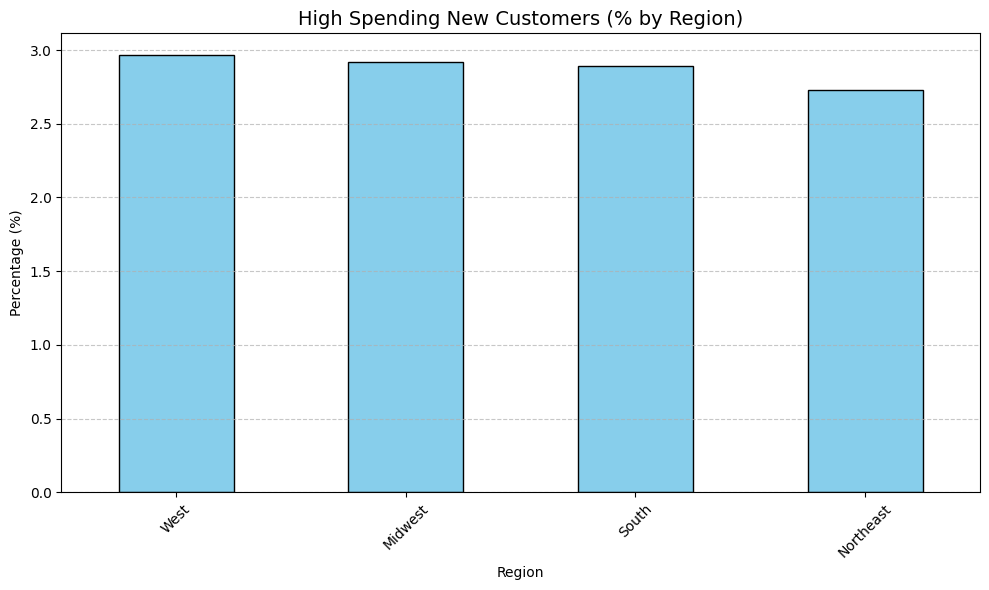

In [113]:
#Then plot this

fig1 = plt.figure(figsize=(10,6))
high_spend_percent.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('High Spending New Customers (% by Region)', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


So, that's pretty consistent, we don't want to prioritise one region over another

In [114]:
#Crate a savee path

save_path = '/content/drive/My Drive/Plots/'


In [115]:
#Save this chart

fig1.savefig(save_path + 'high_spend_by_region.png', dpi=300)


Let's look at one further split - by family circumstance

**Visualising proportion of profile by family circumstance**

In [116]:
#First, calculations to get the % of this profile by different circumstances

# Total customers per circumstance
circumstance_counts = df['family_circumstance'].value_counts()

# High spend new customers per circumstance
high_spend_counts_circum = df[df['high_spend_new'] == 1]['family_circumstance'].value_counts()

# Calculate percentage
high_spend_percent_circum = (high_spend_counts_circum / circumstance_counts * 100).sort_values(ascending=False)

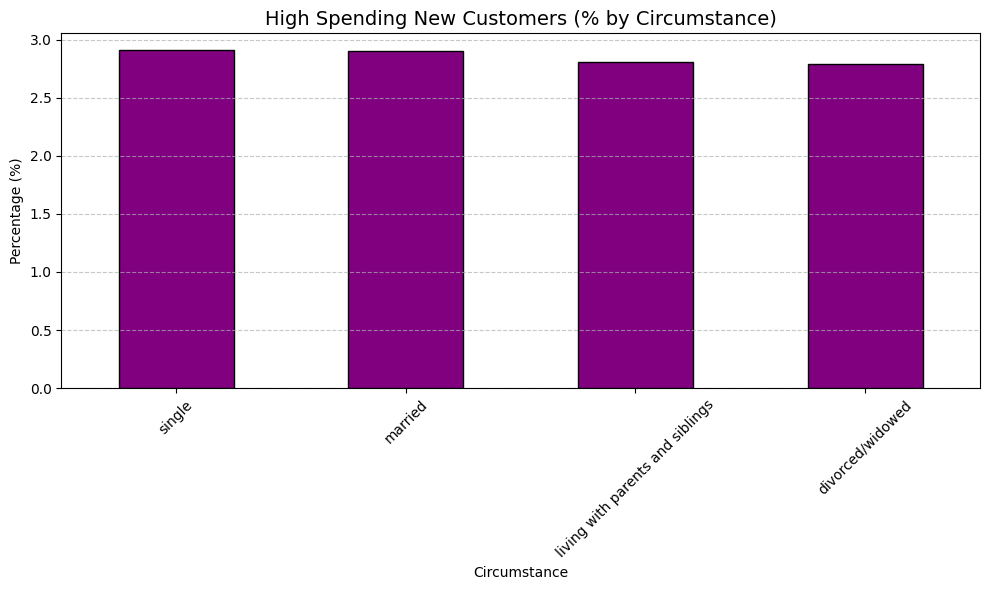

In [117]:
#Then plot this

fig2 = plt.figure(figsize=(10,6))
high_spend_percent_circum.plot(kind='bar', color='purple', edgecolor='black')

plt.title('High Spending New Customers (% by Circumstance)', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Circumstance')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [118]:
#Save this chart

fig2.savefig(save_path + 'high_spend_by_circumstance.png', dpi=300)


And there's very little difference here too - so let's not try and split this profile any further!

**Office hours profile - comparing a profile with whole population**

This time, what I really want to do is compare the profile of people shopping in office hours with the whole population

What I could do is create a new variable and column in the orginal df, but I want to learn a new method

In [119]:
#Start by creating a very small data frame of the averages we are looking for

#first step is to create 2 x dataframes of the values of columns we need

metrics = ['prices', 'income', 'Age', 'number_dependents']

df_means = df[metrics].mean()
df_office_hours_means = df_office_hours[metrics].mean()

In [120]:
#Then bring them into a single dataframe

comparison_df = pd.DataFrame({
    'Dataset 1_All': df_means,
    'Dataset 2_Office_Hours': df_office_hours_means
})


In [121]:
print(comparison_df)

                   Dataset 1_All  Dataset 2_Office_Hours
prices                  7.689377                7.684024
income              99537.977587            99202.504466
Age                    49.471951               49.435327
number_dependents       1.499961                1.501132


So, there is very little difference between orders or demographics in office hours

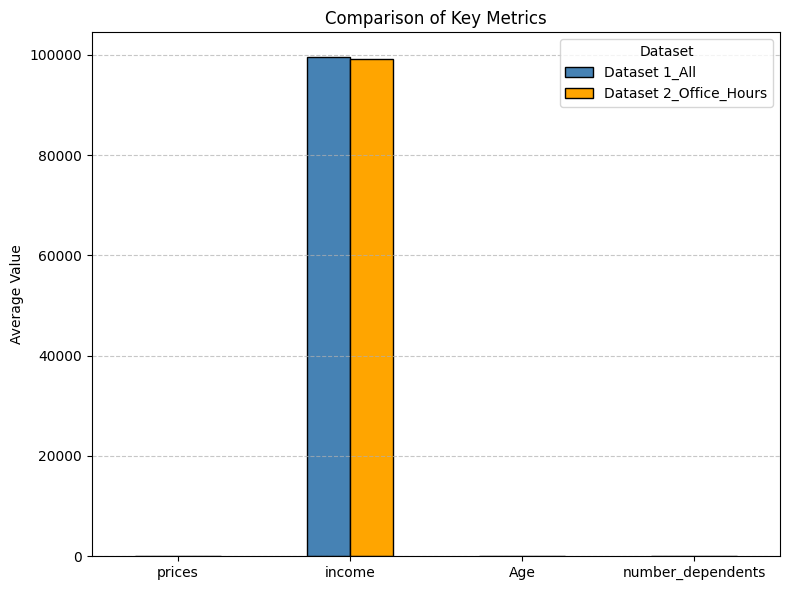

In [122]:
#Then plot (which we know doesn;t show much, and values on v different scales!

comparison_df.plot(kind='bar', figsize=(8,6), color=['steelblue', 'orange'], edgecolor='black')

plt.title('Comparison of Key Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


Lets's see how sales by department varies in office hours compared to overall

**Sales by department in office hours v overall**

In [123]:
df['department_id'].value_counts(dropna=False)

,count
department_id,
4,232002
16,150376
19,87691
7,82527
1,69356
13,56227
15,36229
3,35045
9,26265


In [124]:
df_depts = df['department_id'].value_counts(dropna=False)
df_depts_office = df_office_hours['department_id'].value_counts(dropna=False)

In [125]:
#Then bring them into a single dataframe

comparison2_df = pd.DataFrame({
    'Departments_All Times': df_depts,
    'Departments_Office Hours': df_depts_office
})

# Calculate percentage spend
comparison2_df['Percentage Spend'] = ( comparison2_df['Departments_Office Hours'] / comparison2_df['Departments_All Times'] * 100)

In [126]:
print(comparison2_df)

               Departments_All Times  Departments_Office Hours  \
department_id                                                    
4                             232002                    165165   
16                            150376                    106905   
19                             87691                     63823   
7                              82527                     60197   
1                              69356                     49091   
13                             56227                     40654   
15                             36229                     26233   
3                              35045                     25211   
9                              26265                     18764   
20                             24927                     17948   
17                             24921                     17711   
12                             23665                     16923   
14                             18272                     12862   
11        

So, there is only 1 department that sells a considerably higher percentage in office hours, and that is Department 5.

Department 5 is alcohol, so let's look at who buys that!

Just in our office hours df, let's look at age of alcohol buyers.

**Line chart: alcohol sales by age**

In [127]:
#create a line chart#

#First, a df of just sales of alchohol (where dept-id = 5)

df_alcohol_office_hours = df_office_hours[df_office_hours['department_id'] == 5]

# And then prepare the data, with a groupby

age_alcohol_sales = df_alcohol_office_hours.groupby('Age').size().reset_index(name='Number of Alcohol Sales')

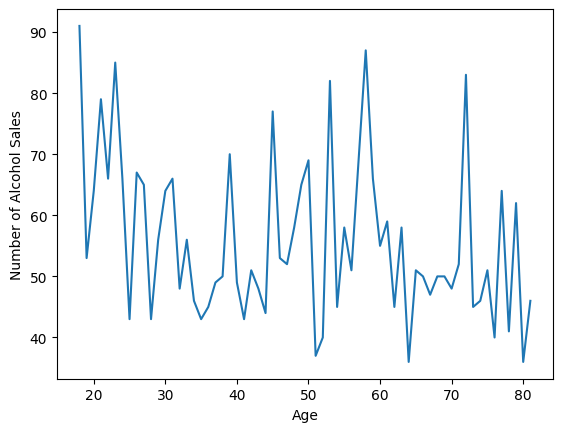

In [128]:
#Now ready to create the line chart

line1 = sns.lineplot(data = age_alcohol_sales, x = 'Age',y = 'Number of Alcohol Sales')

Looks really spiky, but feels like trend might be downwards, let's try a histogram instead

**Histogram: alcohol sales by age**

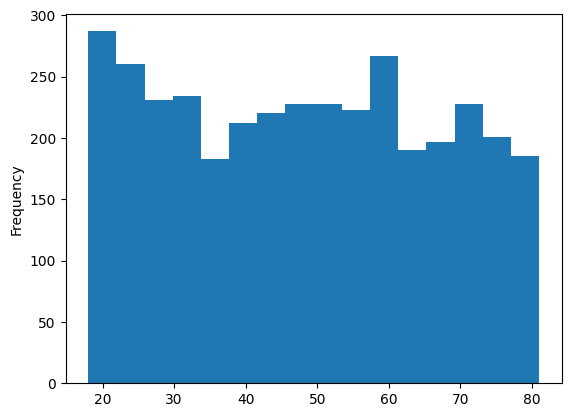

In [129]:
#Histogram where evert bin equates to 4 years.

hist1 = df_alcohol_office_hours['Age'].plot.hist(bins = 16)

Can see from this that the overall trend is downward with age, but there are two key age groups that do drink more: those just under 20 and into mid 20s, and those from mid 50s to 60.

In [130]:
#Save this chart

fig = hist1.get_figure()
fig.savefig(save_path + 'hist_age_alcohol.png', dpi=300)

Let's look at their genders too.

**Genders of people buying alcohol**

In [131]:
#First, a new df of just these ages

df_alcohol_ages = df_alcohol_office_hours[df_alcohol_office_hours['Age'].isin([18,19,20,21,22,23,24,25,57,58,59,60])]

In [132]:
df_alcohol_ages.head()


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,Gender,State,Age,date_joined,number_dependents,family_circumstance,income,_merge,Region,Profile
5735,119,Chardonnay Paso Robles,62,5,5.5,2809322,6696,prior,26,4,...,Female,Indiana,25,4/20/2019,2,married,79922,both,Midwest,Multiple_Mom
14667,234,Tennessee Whiskey,124,5,3.1,1573584,126808,prior,22,2,...,Male,Nebraska,24,4/8/2018,0,single,56914,both,Midwest,Other
14673,234,Tennessee Whiskey,124,5,3.1,2991035,126808,prior,27,2,...,Male,Nebraska,24,4/8/2018,0,single,56914,both,Midwest,Other
14676,234,Tennessee Whiskey,124,5,3.1,1459314,126808,prior,20,1,...,Male,Nebraska,24,4/8/2018,0,single,56914,both,Midwest,Other
24197,350,Mixed 12 Pack Lion's Share Ale,27,5,2.6,2404284,69743,prior,19,2,...,Female,New Mexico,24,11/21/2017,3,married,171587,both,West,Multiple_Mom


In [133]:
df_alcohol_ages.shape

(824, 34)

We're getting down to small numbers now, so may not be relvant unless a big disparity in gender

<Axes: ylabel='count'>

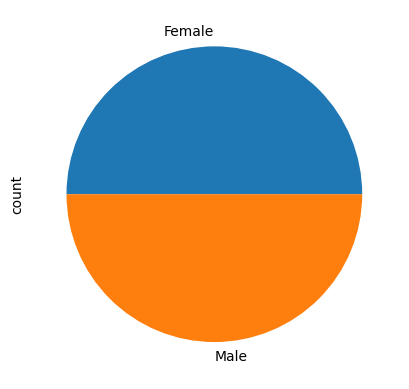

In [134]:
#This is best as a pie chart

df_alcohol_ages['Gender'].value_counts().plot.pie()

In [135]:
#Let's just look at those values

df_alcohol_ages['Gender'].value_counts()

,count
Gender,
Female,412
Male,412


No disparity at all!

**Key stats - those buying alcohol**

In [136]:
#Looking at some other key stats about this group

df_alcohol_ages[['prices', 'order_number', 'days_since_prior_order', 'average_order', 'Age', 'number_dependents']].describe()

,prices,order_number,days_since_prior_order,average_order,Age,number_dependents
count,824.000000,824.000000,786.000000,824.000000,824.000000,824.000000
mean,8.371602,18.491505,9.282443,7.867598,33.765777,1.592233
std,4.144785,16.629328,8.272685,2.018143,17.636322,1.148188
min,1.100000,1.000000,0.000000,1.250000,18.000000,0.000000
25%,4.725000,6.000000,4.000000,6.668333,20.000000,1.000000
50%,8.100000,13.000000,7.000000,7.867647,23.000000,2.000000
75%,13.200000,26.000000,12.000000,9.145833,58.000000,3.000000
max,15.000000,91.000000,30.000000,18.750000,60.000000,3.000000


In [137]:
#And quickly copmparing with everyone

df[['prices', 'order_number', 'days_since_prior_order', 'average_order', 'Age', 'number_dependents']].describe()

,prices,order_number,days_since_prior_order,average_order,Age,number_dependents
count,918370.000000,918370.000000,876687.000000,918370.000000,918370.000000,918370.000000
mean,7.689377,18.526237,10.609581,7.689377,49.471951,1.499961
std,4.399702,17.781406,8.441550,1.879304,18.490217,1.119581
min,1.000000,1.000000,0.000000,1.000000,18.000000,0.000000
25%,4.000000,6.000000,5.000000,6.550000,33.000000,0.000000
50%,7.200000,12.000000,7.000000,7.641379,49.000000,1.000000
75%,11.000000,26.000000,14.000000,8.769565,66.000000,3.000000
max,25.000000,99.000000,30.000000,25.000000,81.000000,3.000000


We can see that these alcohol drinkers ARE younger, and their average order is greater

Combine for greater clarity

**Comparing stats of those buying alcohol with whole population**

In [138]:
# Get summary stats for both
desc1 = df_alcohol_ages[['prices', 'order_number', 'days_since_prior_order',
                         'average_order', 'Age', 'number_dependents']].describe()

desc2 = df[['prices', 'order_number', 'days_since_prior_order',
            'average_order', 'Age', 'number_dependents']].describe()

# Add a distinguishing key so we can join them
desc1['dataset'] = 'df_alcohol_ages'
desc2['dataset'] = 'df'

# Combine along rows then pivot so they sit side by side
comparison = (pd.concat([desc1, desc2])
                .reset_index()
                .pivot(index='index', columns='dataset'))

In [139]:
print(comparison)

                prices                   order_number                  \
dataset             df df_alcohol_ages             df df_alcohol_ages   
index                                                                   
25%           4.000000        4.725000       6.000000        6.000000   
50%           7.200000        8.100000      12.000000       13.000000   
75%          11.000000       13.200000      26.000000       26.000000   
count    918370.000000      824.000000  918370.000000      824.000000   
max          25.000000       15.000000      99.000000       91.000000   
mean          7.689377        8.371602      18.526237       18.491505   
min           1.000000        1.100000       1.000000        1.000000   
std           4.399702        4.144785      17.781406       16.629328   

        days_since_prior_order                  average_order                  \
dataset                     df df_alcohol_ages             df df_alcohol_ages   
index                             

In [140]:
# Select only certain rows
rows_to_keep = ['mean']
filtered = comparison.loc[rows_to_keep]

print(filtered)

           prices                 order_number                  \
dataset        df df_alcohol_ages           df df_alcohol_ages   
index                                                            
mean     7.689377        8.371602    18.526237       18.491505   

        days_since_prior_order                 average_order                  \
dataset                     df df_alcohol_ages            df df_alcohol_ages   
index                                                                          
mean                 10.609581        9.282443      7.689377        7.867598   

               Age                 number_dependents                  
dataset         df df_alcohol_ages                df df_alcohol_ages  
index                                                                 
mean     49.471951       33.765777          1.499961        1.592233  


(NB: since I only eenetually wanted the means, I could have done this in a much simpler way with value_counts and mean as the agg function)

This helps us more clarly see the patterns. THose buying alcohol in the working day are spending more, a little more frequently, and are quite a lot younger.

It;s a small semgent but one worth looking at in more detail.

So, let's visualise the numbers per region

**Visualise alcohol profile by region**

In [141]:
#Show value counts

df_alcohol_ages['Region'].value_counts()


,count
Region,
South,239
West,232
Midwest,219
Northeast,134


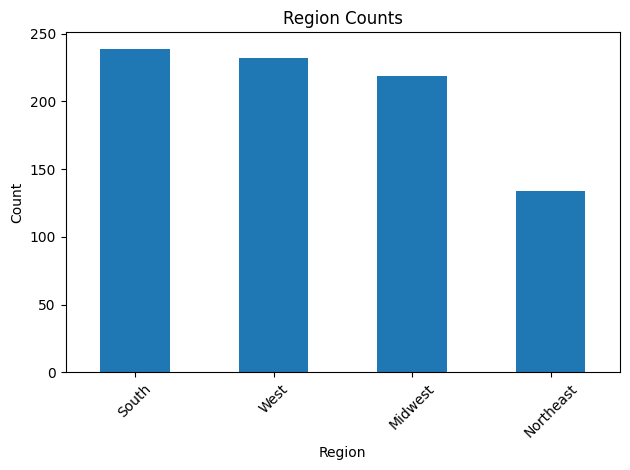

In [142]:
#Plot the value counts
#NB - just adding .plot.bar() did not work by itself - a quirk of colab

bar_region_alcohol = df_alcohol_ages['Region'].value_counts().plot.bar()
plt.title('Region Counts')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


So, quite a lot fewer in the North East

In [143]:
#Save this chart

fig2 = bar_region_alcohol.get_figure()
fig2.savefig(save_path + 'bar_region_alcohol.png', dpi=300)

# **PROFILE of the SOUTH**

I want to look at top selling products in the South, compared to the other regions.

Start with a smaller data frame, just of the top 25 products

**Creating a smaller data frame - based on total $ sales**

In [144]:


# Step 1: Get total sales by product (across all regions) - new varibale created by a groupby, based on sum of sales
product_totals = df.groupby("product_name")["prices"].sum().reset_index()

# Step 2: Sort by sales and select top 25 - use head to cap at 25
top25 = product_totals.sort_values(by="prices", ascending=False).head(25)

# Step 3: Filter the original df down to only these top 25
df_top25 = df[df["product_name"].isin(top25["product_name"])]


In [145]:
print(top25)

                          product_name    prices
1010            Bag of Organic Bananas  368029.3
765           Apple Honeycrisp Organic  112447.5
9044              Organic Navel Orange   62520.4
1455                       Blueberries   53349.8
8246                Orange Bell Pepper   53102.4
11785                Shredded Parmesan   48240.0
14260                       Whole Milk   43686.0
5615                     Hass Avocados   42269.5
11998               Small Hass Avocado   39679.2
9207                 Organic Red Onion   38763.9
8454                  Organic Broccoli   38262.0
9217       Organic Reduced Fat 2% Milk   36426.9
11362                    Russet Potato   34620.2
9442              Organic Turkey Bacon   33976.8
130             100% Raw Coconut Water   31521.6
9199           Organic Red Bell Pepper   31059.3
5374                       Green Beans   30495.0
9005                      Organic Milk   30408.3
152             100% Whole Wheat Bread   30180.8
8932                

In [146]:
# Step 1: Create a new column labeling South vs Other
df_top25["region_group"] = df_top25["Region"].apply(lambda x: "South" if x == "South" else "Other")

# Step 2: Group by product_name and region_group, summing prices
comparison = (
    df_top25.groupby(["product_name", "region_group"])["prices"]
    .sum()
    .reset_index()
)

# Step 3: Pivot so South and Other are columns
comparison_pivot = comparison.pivot(
    index="product_name",
    columns="region_group",
    values="prices"
).fillna(0).reset_index()

/tmp/ipython-input-1426858122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top25["region_group"] = df_top25["Region"].apply(lambda x: "South" if x == "South" else "Other")


In [147]:
print(comparison_pivot)

region_group                     product_name     Other     South
0                      100% Raw Coconut Water   21208.0   10313.6
1                      100% Whole Wheat Bread   20150.0   10030.8
2                    Apple Honeycrisp Organic   73771.2   38676.3
3                      Bag of Organic Bananas  246777.7  121251.6
4                                 Blueberries   35202.6   18147.2
5                         Granny Smith Apples   19817.6    9354.4
6                                 Green Beans   20200.8   10294.2
7                                Green Onions   20109.6    9273.6
8                               Hass Avocados   28191.8   14077.7
9                          Orange Bell Pepper   34913.2   18189.2
10                           Organic Broccoli   25788.0   12474.0
11            Organic Chicken & Apple Sausage   18103.8    8376.7
12                              Organic Lemon   19983.6    9878.4
13                               Organic Milk   20837.2    9571.1
14        

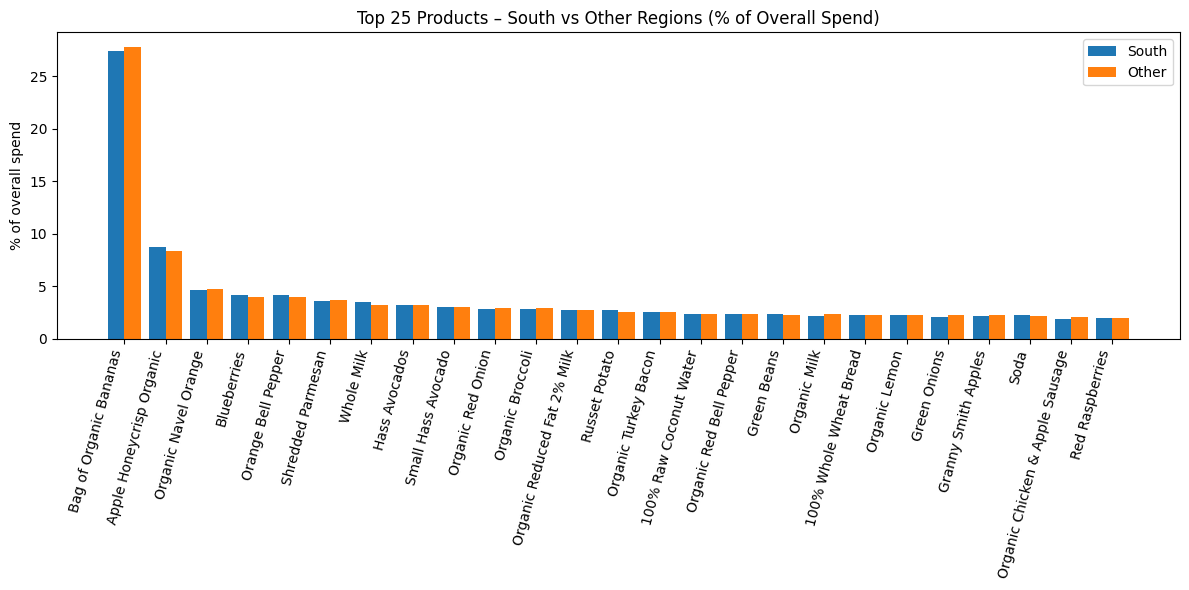

In [148]:
# Step 1: Grand total spend across all top25 products & regions
grand_total_south = comparison_pivot["South"].sum()
grand_total_other = comparison_pivot["Other"].sum()


# Step 2: Calculate percentages of GRAND TOTAL
comparison_pivot["South_pct"] = comparison_pivot["South"] / grand_total_south * 100
comparison_pivot["Other_pct"] = comparison_pivot["Other"] / grand_total_other * 100

# Step 3: Sort by total spend (descending)
comparison_pivot["total"] = comparison_pivot["South"] + comparison_pivot["Other"]
comparison_sorted = comparison_pivot.sort_values(by="total", ascending=False)

# Step 4: Plot grouped bar chart
bar_products_south = plt.figure(figsize=(12,6))
bar_width = 0.4
x = range(len(comparison_sorted))

plt.bar([i - bar_width/2 for i in x], comparison_sorted["South_pct"],
        width=bar_width, label="South")
plt.bar([i + bar_width/2 for i in x], comparison_sorted["Other_pct"],
        width=bar_width, label="Other")

# Formatting
plt.xticks(x, comparison_sorted["product_name"], rotation=75, ha="right")
plt.ylabel("% of overall spend")
plt.title("Top 25 Products – South vs Other Regions (% of Overall Spend)")
plt.legend()
plt.tight_layout()
plt.show()


In [149]:
#Save this chart

fig3 = bar_products_south.get_figure()
fig3.savefig(save_path + 'bar_products_south', dpi=300)

All of which goes to show that people in the south have very similar spending patterns to everyone else!

Just a bit less on product~1 porganic bananas and a bit more on product#2 organic apples

**Creating a smaller data frame - based on count of sales**

In [150]:
# Step 1: Get total sales by product (across all regions) - new variable created by a groupby, based on the count of sales (so could have used anly column for the counts)
product_total_counts = df.groupby("product_name")["order_id"].count().reset_index()

# Step 2: Sort by sales and select top 25 - use head to cap at 25
top25count = product_total_counts.sort_values(by="order_id", ascending=False).head(25)

# Step 3: Filter the original df down to only these top 25
df_top25count = df[df["product_name"].isin(top25["product_name"])]

In [151]:
print(top25count)

                                            product_name  order_id
1010                              Bag of Organic Bananas     35731
12582                                       Strawberries     13019
8932                                       Organic Lemon      8295
765                             Apple Honeycrisp Organic      7975
11644                                Seedless Red Grapes      7630
14426                                      Yellow Onions      6731
9207                                   Organic Red Onion      6153
152                               100% Whole Wheat Bread      5804
9199                             Organic Red Bell Pepper      5449
1455                                         Blueberries      5033
5615                                       Hass Avocados      4645
9217                         Organic Reduced Fat 2% Milk      4611
11998                                 Small Hass Avocado      4509
9044                                Organic Navel Orange      

List is a little bit different, so let's persevere

In [152]:
# Step 1: Create a new column labeling South vs Other - Lanbda x is a new way of labelling - but works on same principle
df_top25count["region_group"] = df_top25["Region"].apply(lambda x: "South" if x == "South" else "Other")

# Step 2: Group by product_name and region_group, summing prices
comparison = (
    df_top25count.groupby(["product_name", "region_group"])["order_id"]
    .count()
    .reset_index()
)

# Step 3: Pivot so South and Other are columns - again a new technique to me - need to investigate further
comparison_pivot = comparison.pivot(
    index="product_name",
    columns="region_group",
    values="order_id"
).fillna(0).reset_index()

/tmp/ipython-input-3199596425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top25count["region_group"] = df_top25["Region"].apply(lambda x: "South" if x == "South" else "Other")


In [153]:
print(comparison_pivot)

region_group                     product_name  Other  South
0                      100% Raw Coconut Water   2410   1172
1                      100% Whole Wheat Bread   3875   1929
2                    Apple Honeycrisp Organic   5232   2743
3                      Bag of Organic Bananas  23959  11772
4                                 Blueberries   3321   1712
5                         Granny Smith Apples   2252   1063
6                                 Green Beans   1772    903
7                                Green Onions   1596    736
8                               Hass Avocados   3098   1547
9                          Orange Bell Pepper   2359   1229
10                           Organic Broccoli   2456   1188
11            Organic Chicken & Apple Sausage    858    397
12                              Organic Lemon   5551   2744
13                               Organic Milk   1844    847
14                       Organic Navel Orange   2816   1380
15                    Organic Red Bell P

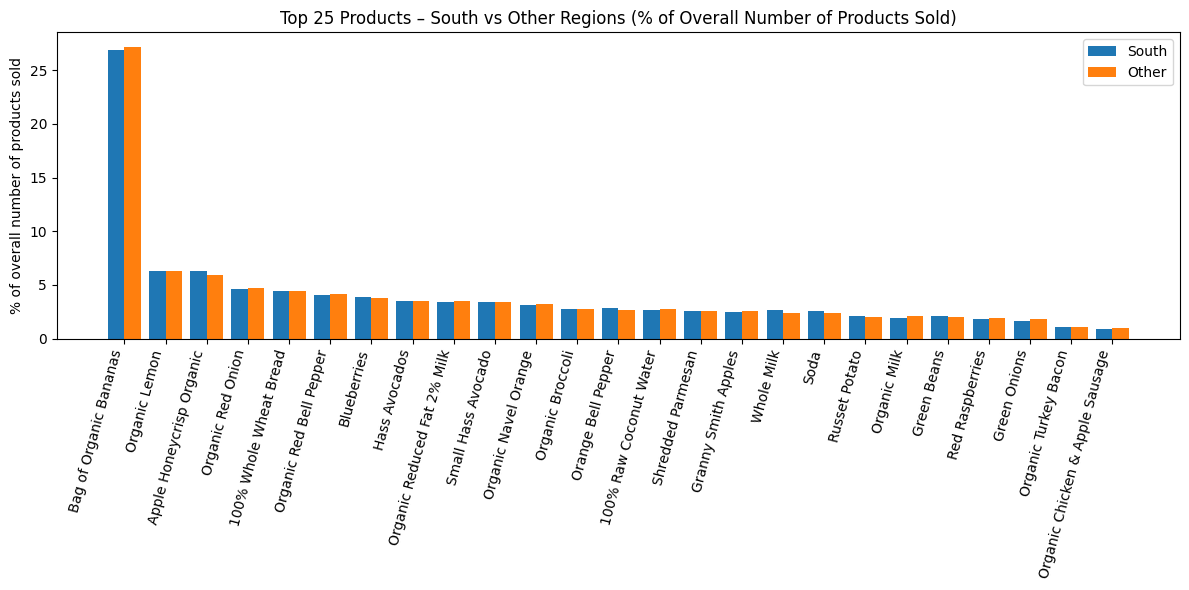

In [155]:
# Step 1: Grand total spend across all top25 products & regions
total_counts_south = comparison_pivot["South"].sum()
total_counts_other = comparison_pivot["Other"].sum()


# Step 2: Calculate percentages of GRAND TOTAL - with a new variable / column
comparison_pivot["South_pct"] = comparison_pivot["South"] / total_counts_south * 100
comparison_pivot["Other_pct"] = comparison_pivot["Other"] / total_counts_other * 100

# Step 3: Sort by total spend (descending)
comparison_pivot["total"] = comparison_pivot["South"] + comparison_pivot["Other"]
comparison_sorted = comparison_pivot.sort_values(by="total", ascending=False)

# Step 4: Plot grouped bar chart
bar_products_south = plt.figure(figsize=(12,6))
bar_width = 0.4
x = range(len(comparison_sorted))

plt.bar([i - bar_width/2 for i in x], comparison_sorted["South_pct"],
        width=bar_width, label="South")
plt.bar([i + bar_width/2 for i in x], comparison_sorted["Other_pct"],
        width=bar_width, label="Other")

# Formatting
plt.xticks(x, comparison_sorted["product_name"], rotation=75, ha="right")
plt.ylabel("% of overall number of products sold")
plt.title("Top 25 Products – South vs Other Regions (% of Overall Number of Products Sold)")
plt.legend()
plt.tight_layout()
plt.show()


Again - not very interesting - just confirms what we knew before!

So, will complete the profileing here, and summarise